# Sympy

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Let us import everything from sympy. We will also enable pretty printing.

In [16]:
from sympy import *
init_printing()

We must define symbols which will be treated symbolically

In [17]:
x = symbols('x')

Let us define an expression and differentiate it

In [18]:
f = x*sin(pi*x) + tan(pi*x)
diff(f,x)

Compute second derivative

In [19]:
diff(f,x,2)

Define a more complicated function as product of two functions 
$$
h(x) = f(x) g(x)
$$
and differentiate it

In [20]:
g = exp(x)
h = f*g
diff(h,x)

Composition of two functions
$$
h(x) = (f o g)(x) = f(g(x))
$$

In [21]:
f = sin(x)
g = cos(x)
h = f.subs({'x':g})
print('h =',h)
diff(h,x)

h = sin(cos(x))


We can also compute integrals

In [22]:
integrate(f,x)

Compute Taylor expansion

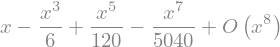

In [23]:
series(sin(x),x,0,8)

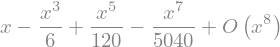

In [24]:
series(f,x,0,8)

## Compute roots

Let us find roots of quadratic equation

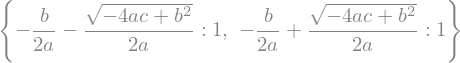

In [25]:
x, a, b, c = symbols('x a b c')
eq = a*x**2 + b*x + c
roots(eq,x)

## Solve a linear system
$$
x_1 + x_2 = a, \qquad x_1 - x_2 = b
$$

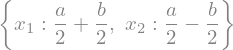

In [26]:
x1, x2, a, b = symbols('x1 x2 a b')
e1 = x1 + x2 - a
e2 = x1 - x2 - b
solve([e1, e2],[x1,x2])

## Example: create Python function from sympy expression

Lets first define a function and get its derivative.

In [27]:
x = symbols('x')
f = x*sin(50*x)*exp(x)
g = diff(f,x)

We cannot evaluate f and g since they are not functions. We first create Python functions out of the symbolic expressions and then plot them.

In [28]:
ffun = lambdify(x,f)
gfun = lambdify(x,g)

We can now evaluate these functions at some argument

In [29]:
print('f(1) =',ffun(1.0))
print('g(1) =',gfun(1.0))

f(1) = -0.7132087970679899
g(1) = 129.72606342238427


We can now use these to plot graphs of the functions

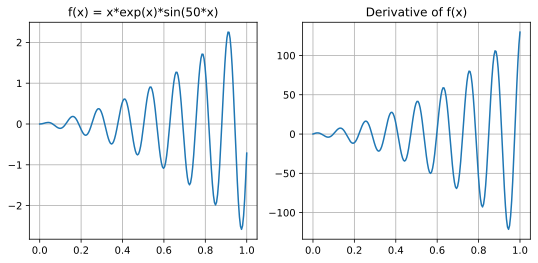

In [30]:
xx = np.linspace(0.0,1.0,200)
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(xx,ffun(xx))
plt.grid(True)
plt.title('f(x) = '+str(f))
plt.subplot(122)
plt.plot(xx,gfun(xx))
plt.grid(True)
plt.title('Derivative of f(x)');

## Example: Truncation error of FD scheme

Approximate second derivative using finite difference scheme
$$
f''(x) \approx \frac{f(x-h) - 2 f(x) + f(x+h)}{h^2}
$$
We perform Taylor expansion around $x$ to find the error in this approximation

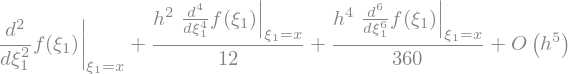

In [31]:
x, h = symbols("x,h")
f = Function("f")
T = lambda x,h: (f(x-h) - 2*f(x) + f(x+h))/(h*h)
series(T(x,h), h, x0=0, n=5)

The above result shows that the FD formula is equal to
$$
f''(x) + \frac{h^2}{12} f^{(4)}(x) + \frac{h^4}{360} f^{(6)}(x) + O(h^5)
$$
The leading error term is $O(h^2)$ so that the formula is second order accurate.